In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import tree

In [2]:
TraffData = pd.read_csv("cleaned_traffic_data.csv",sep=',',parse_dates=['Date'])
TraffData['Date'] = TraffData['Date'].dt.strftime('%m/%d/%Y')
TraffData

,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT
0,09/09/2019,1,47,4.50,2.566,2.430
1,06/17/2019,1,50,7.60,4.266,3.840
2,06/17/2019,1,50,7.60,3.934,3.545
3,06/17/2019,1,50,7.60,2.924,2.640
4,09/09/2019,1,50,7.60,6.164,5.520
...,...,...,...,...,...,...
581,06/27/2019,374,28,6.83,241.000,220.000
582,06/27/2019,374,30,11.04,488.000,440.000
583,06/04/2019,376,10,5.68,1.409,1.320
584,05/28/2019,376,20,5.96,2.215,2.080


In [3]:
AllCOData = pd.read_csv("Nova_Scotia_Provincial_Ambient_Carbon_Monoxide__CO__Hourly_Data_Halifax_Johnston.csv", sep =',')
AllCOData.head()

,Date & Time,Pollutant,Unit,Station,Average
0,01/01/2019 12:00:00 AM,CO,ppm,Halifax Johnston,0.25
1,01/01/2019 01:00:00 AM,CO,ppm,Halifax Johnston,0.26
2,01/01/2019 02:00:00 AM,CO,ppm,Halifax Johnston,0.20
3,01/01/2019 03:00:00 AM,CO,ppm,Halifax Johnston,0.17
4,01/01/2019 04:00:00 AM,CO,ppm,Halifax Johnston,0.15


In [4]:
COData = AllCOData[['Date & Time','Average']]
COData.rename(columns=({'Date & Time':'Date'}),inplace=True,)
COData[['Date','Time','AP']] =  COData.Date.str.split(" ", expand = True)
COData = COData[['Date','Average']] 
COData = COData[COData['Date'].str.contains('[\d/]2019')]
COData = COData.groupby('Date').mean()
COData


C:\Users\Mayank\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\Mayank\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Average
Date,
01/01/2019,0.146250
01/02/2019,0.152917
01/03/2019,0.198333
01/04/2019,0.178333
01/05/2019,0.197083
...,...
12/27/2019,0.127083
12/28/2019,0.116250
12/29/2019,0.106667


In [5]:
MergedData = pd.merge(TraffData,COData,on='Date',how='left')
MergedData

,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT,Average
0,09/09/2019,1,47,4.50,2.566,2.430,0.122174
1,06/17/2019,1,50,7.60,4.266,3.840,0.144167
2,06/17/2019,1,50,7.60,3.934,3.545,0.144167
3,06/17/2019,1,50,7.60,2.924,2.640,0.144167
4,09/09/2019,1,50,7.60,6.164,5.520,0.122174
...,...,...,...,...,...,...,...
581,06/27/2019,374,28,6.83,241.000,220.000,0.073913
582,06/27/2019,374,30,11.04,488.000,440.000,0.073913
583,06/04/2019,376,10,5.68,1.409,1.320,0.122083
584,05/28/2019,376,20,5.96,2.215,2.080,0.097391


In [6]:
cols_to_norm = ['Average','ADT','AADT']
print(cols_to_norm)
MergedData[cols_to_norm] = MergedData[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
MergedData

['Average', 'ADT', 'AADT']


,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT,Average
0,09/09/2019,1,47,4.50,0.001571,0.001446,0.542614
1,06/17/2019,1,50,7.60,0.003282,0.002872,0.698085
2,06/17/2019,1,50,7.60,0.002948,0.002573,0.698085
3,06/17/2019,1,50,7.60,0.001932,0.001658,0.698085
4,09/09/2019,1,50,7.60,0.005191,0.004570,0.542614
...,...,...,...,...,...,...,...
581,06/27/2019,374,28,6.83,0.241446,0.221436,0.201447
582,06/27/2019,374,30,11.04,0.489938,0.443883,0.201447
583,06/04/2019,376,10,5.68,0.000407,0.000324,0.541973
584,05/28/2019,376,20,5.96,0.001218,0.001092,0.367420


In [7]:
MergedData['COIndex'] = np.where(MergedData['Average']<0.5,'Low','High')
MergedData

,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT,Average,COIndex
0,09/09/2019,1,47,4.50,0.001571,0.001446,0.542614,High
1,06/17/2019,1,50,7.60,0.003282,0.002872,0.698085,High
2,06/17/2019,1,50,7.60,0.002948,0.002573,0.698085,High
3,06/17/2019,1,50,7.60,0.001932,0.001658,0.698085,High
4,09/09/2019,1,50,7.60,0.005191,0.004570,0.542614,High
...,...,...,...,...,...,...,...,...
581,06/27/2019,374,28,6.83,0.241446,0.221436,0.201447,Low
582,06/27/2019,374,30,11.04,0.489938,0.443883,0.201447,Low
583,06/04/2019,376,10,5.68,0.000407,0.000324,0.541973,High
584,05/28/2019,376,20,5.96,0.001218,0.001092,0.367420,Low


**Below shows Normal-Distribution of column Average after normalization**

<AxesSubplot:ylabel='Density'>

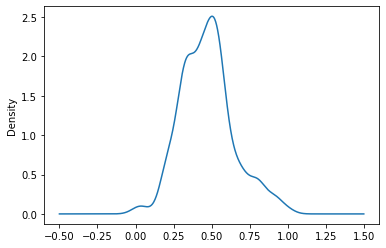

In [8]:
MergedData['Average'].plot.kde()

**Below shows data visulaization monthly and plot for Average, ADT, AADT**

In [9]:
MonthlyMergedData = MergedData
MonthlyMergedData['Month']= pd.DatetimeIndex(MergedData['Date']).month
MonthlyMergedData = MonthlyMergedData.groupby('Month').mean()
cols_to_norm = ['Average','ADT','AADT']
print(cols_to_norm)
MonthlyMergedData[cols_to_norm] = MonthlyMergedData[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
MonthlyMergedData


['Average', 'ADT', 'AADT']


,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT,Average
Month,,,,,,
4,213.900000,36.100000,5.921000,0.601755,0.488117,0.689652
5,120.608108,66.918919,7.076723,0.618436,0.503683,0.529338
6,141.291667,56.937500,8.790854,1.000000,0.750396,0.291653
7,190.831858,32.734513,8.732389,0.996919,1.000000,0.668474
8,189.225352,49.070423,8.116507,0.705706,0.703298,0.728707
9,99.615385,70.169231,6.644262,0.260777,0.317203,0.436449
10,142.204082,29.306122,4.890633,0.071712,0.049255,0.000000
11,141.250000,90.166667,4.101750,0.000000,0.000000,0.555140
12,103.083333,47.916667,3.670000,0.019251,0.016470,1.000000


<AxesSubplot:xlabel='Month'>

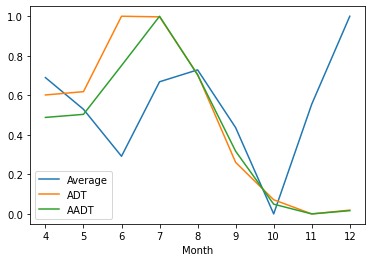

In [10]:
MonthlyMergedData[['Average','ADT','AADT']].plot()

**Average distribution is symmetric with few outlier**

<AxesSubplot:>

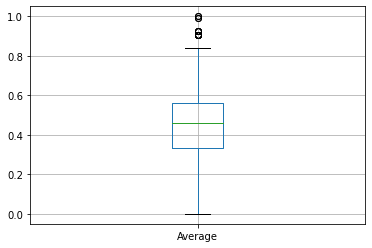

In [11]:
MergedData.boxplot(column=['Average'])

**ADT distribution is positively skewed with few outliers**

<AxesSubplot:>

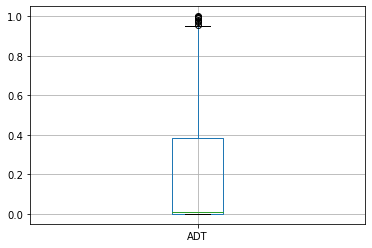

In [12]:
MergedData.boxplot(column=['ADT'])

**AADT distribution is positively skewed**

<AxesSubplot:>

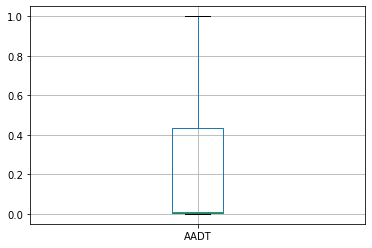

In [13]:
MergedData.boxplot(column=['AADT'])

**ADT and Average on compare is non-linear**

<AxesSubplot:xlabel='ADT', ylabel='Average'>

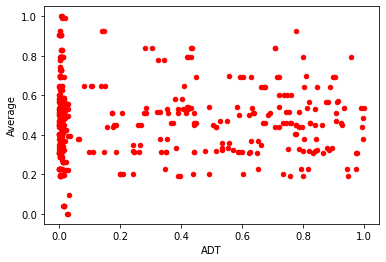

In [14]:
MergedData.plot.scatter(x='ADT',
                y='Average',
                c='Red')

**AADT and Average on compare is non-linear**

<AxesSubplot:xlabel='AADT', ylabel='Average'>

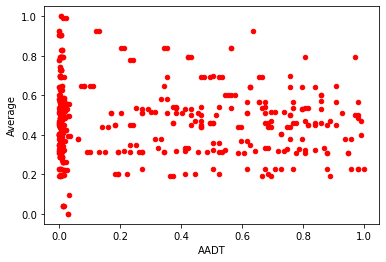

In [15]:
MergedData.plot.scatter(x='AADT',
                y='Average',
                c='Red')

**ADT and AADT on compare is linear, so we will consider only ADT into feature and will remove AADT as both are linear and taking both will not improve our model**

<AxesSubplot:xlabel='ADT', ylabel='AADT'>

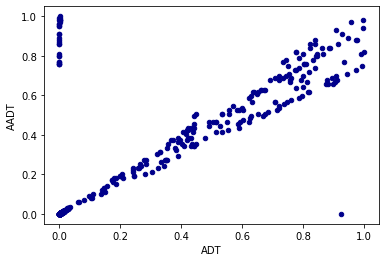

In [16]:
MergedData.plot.scatter(x='ADT',
                y='AADT',
                c='DarkBlue')

**Below is the bar graph for our Target attribute of model i.e. COIndex**

<AxesSubplot:>

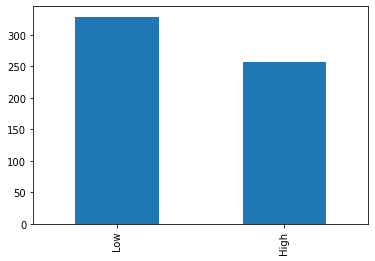

In [17]:
MergedData['COIndex'].value_counts().plot(kind='bar')

In [18]:
MergedData = MergedData[['HIGHWAY','SECTION','SECTION LENGTH','ADT','COIndex']]

**Below shows Summary Visualization of Data**

In [19]:
MergedData.describe(include = 'all')

,HIGHWAY,SECTION,SECTION LENGTH,ADT,COIndex
count,586.000000,586.000000,586.000000,586.000000,586
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,Low
freq,NaN,NaN,NaN,NaN,329
mean,148.576792,52.779863,7.401891,0.197231,NaN
std,125.552938,56.718809,3.981491,0.306120,NaN
min,1.000000,1.000000,0.200000,0.000000,NaN
25%,7.000000,17.000000,4.150000,0.001846,NaN
50%,104.000000,30.000000,7.253500,0.007201,NaN
75%,245.000000,60.000000,10.040000,0.382794,NaN


In [20]:
MergedData['COIndex'].value_counts(normalize=True)

Low     0.561433
High    0.438567
Name: COIndex, dtype: float64

**Reason for removing colums from our Final Data**<br><Br>
**Date & Time-** removed because our model cannot understand date and time values.<br>
**Pollutant-** removed because in data it is unique as shown below.<br>
**Unit-** removed because in data it is unique as shown below.<br>


In [21]:
AllCOData.describe(include='all')

,Date & Time,Pollutant,Unit,Station,Average
count,236687,236687,236687,236687,205269.000000
unique,236687,1,1,2,NaN
top,01/01/2019 12:00:00 AM,CO,ppm,Halifax,NaN
freq,1,236687,236687,210384,NaN
mean,NaN,NaN,NaN,NaN,0.358628
std,NaN,NaN,NaN,NaN,0.322583
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.130000
50%,NaN,NaN,NaN,NaN,0.270000
75%,NaN,NaN,NaN,NaN,0.500000


**We removed station from final data because for year 2019 its unique as shown below**

In [22]:
AllCOData[(AllCOData["Date & Time"]>='01/01/2019 12:00:00 AM' )& (AllCOData["Date & Time"]<'01/01/2020 12:00:00 AM')]['Station'].nunique()

1

**We removed AADT from the feature list because ADT and ADDT shows linear relationship as shown in below graph so taking both will not improve accuracy of model hence we can drop AADT**<br>

please refer scatter plot bewtween ADT and AADT plotted above which shoes both are linear  

**Creating model after splitting data 50% train and 50% test**


In [23]:
MergedData

,HIGHWAY,SECTION,SECTION LENGTH,ADT,COIndex
0,1,47,4.50,0.001571,High
1,1,50,7.60,0.003282,High
2,1,50,7.60,0.002948,High
3,1,50,7.60,0.001932,High
4,1,50,7.60,0.005191,High
...,...,...,...,...,...
581,374,28,6.83,0.241446,Low
582,374,30,11.04,0.489938,Low
583,376,10,5.68,0.000407,High
584,376,20,5.96,0.001218,Low


In [24]:
MergedData.dtypes

HIGHWAY             int64
SECTION             int64
SECTION LENGTH    float64
ADT               float64
COIndex            object
dtype: object

In [25]:
X = MergedData.values[:,0:4]
Y = MergedData.values[:,-1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
X,Y, test_size = 0.5, random_state = 100) 

In [27]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
y_trainpred = clf_tree.predict(X_train)

In [29]:
print("Confusion Matrix fot raining data: \n", confusion_matrix(y_train,y_trainpred))

Confusion Matrix fot raining data: 
 [[132   0]
 [  0 161]]


In [30]:
print ("Accuracy of training data: \n",
accuracy_score(y_train,y_trainpred)*100)

Accuracy of training data: 
 100.0


In [31]:
y_pred = clf_tree.predict(X_test)

In [32]:
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[ 76  49]
 [ 44 124]]


In [33]:
conmat = confusion_matrix(y_test,y_pred)

In [34]:
TP = conmat[0][0]
FN = conmat[0][1]
FP = conmat[1][0]
TN = conmat[1][1]

In [35]:
Accuracy = (TP + TN)/(TP+FN+FP+TN)
Accuracy

0.6825938566552902

In [36]:
Precision = TP/(TP+FP)
Precision

0.6333333333333333

In [37]:
Recall = TP/(TP+FN)
Recall

0.608

In [38]:
F1_measure = (2*(Recall)*(Precision))/(Recall+Precision)
F1_measure

0.620408163265306

In [39]:
print ("Accuracy of testdata: \n",
accuracy_score(y_test,y_pred)*100)

Accuracy of testdata: 
 68.25938566552901


In [40]:
print("Report : \n",
   classification_report(y_test, y_pred))

Report : 
               precision    recall  f1-score   support

        High       0.63      0.61      0.62       125
         Low       0.72      0.74      0.73       168

    accuracy                           0.68       293
   macro avg       0.68      0.67      0.67       293
weighted avg       0.68      0.68      0.68       293



In [41]:
clf_tree.get_n_leaves()

78

**Creating model using 10-fold cross-validation technique**

**Creating simple 10-fold cross validation without shuffling**

In [42]:
# 10 - fold
model = DecisionTreeClassifier()
scores = cross_val_score(model, X, Y,cv=10,scoring='accuracy')
scores

array([0.44067797, 0.55932203, 0.42372881, 0.23728814, 0.61016949,
       0.59322034, 0.70689655, 0.43103448, 0.53448276, 0.5862069 ])

In [43]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.51 accuracy with a standard deviation of 0.13


**Creating simple 10-fold cross validation with shuffling**

In [44]:
#shuffled 10-fold
model = DecisionTreeClassifier()
cv = ShuffleSplit(n_splits=10, random_state=0)
scores = cross_val_score(model, X, Y,cv=cv, scoring='accuracy')
scores

array([0.66101695, 0.69491525, 0.81355932, 0.74576271, 0.71186441,
       0.76271186, 0.86440678, 0.81355932, 0.79661017, 0.77966102])

In [45]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.76 accuracy with a standard deviation of 0.06


**Creating confusion matrix and classification report for each fold in 10-fold cross validation**

In [46]:
conf_matrix_list = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X):
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = Y[train_index], Y[test_index]
    
    clf_tree.fit(Xtrain, ytrain)
    
    ypred = clf_tree.predict(Xtest)
    conf_matrix = confusion_matrix(ytest, ypred)
    conf_matrix_list .append(conf_matrix)
    print("Report : \n",classification_report(ytest, ypred))

Report : 
               precision    recall  f1-score   support

        High       0.39      0.23      0.29        31
         Low       0.41      0.61      0.49        28

    accuracy                           0.41        59
   macro avg       0.40      0.42      0.39        59
weighted avg       0.40      0.41      0.38        59

Report : 
               precision    recall  f1-score   support

        High       0.24      0.38      0.29        21
         Low       0.48      0.32      0.38        38

    accuracy                           0.34        59
   macro avg       0.36      0.35      0.34        59
weighted avg       0.39      0.34      0.35        59

Report : 
               precision    recall  f1-score   support

        High       0.14      0.07      0.10        28
         Low       0.42      0.61      0.50        31

    accuracy                           0.36        59
   macro avg       0.28      0.34      0.30        59
weighted avg       0.29      0.36      0.

C:\Users\Mayank\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mayank\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mayank\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [47]:
conf_matrix_list

[array([[ 7, 24],
        [11, 17]], dtype=int64),
 array([[ 8, 13],
        [26, 12]], dtype=int64),
 array([[ 2, 26],
        [12, 19]], dtype=int64),
 array([[ 8, 18],
        [16, 17]], dtype=int64),
 array([[13, 13],
        [17, 16]], dtype=int64),
 array([[ 6, 11],
        [22, 20]], dtype=int64),
 array([[10, 18],
        [ 5, 25]], dtype=int64),
 array([[14, 23],
        [12,  9]], dtype=int64),
 array([[25,  0],
        [33,  0]], dtype=int64),
 array([[ 3, 15],
        [12, 28]], dtype=int64)]

**mean of all 10 confusion matrices**

In [48]:
mean_of_conf_matrix_arrays = np.mean(conf_matrix_list, axis=0)
mean_of_conf_matrix_arrays

array([[ 9.6, 16.1],
       [16.6, 16.3]])

**Finding True positive(TP), False Negative(FN), False Positive(FP), True Negative(TN)**

In [49]:
TP = mean_of_conf_matrix_arrays[0][0]
FN = mean_of_conf_matrix_arrays[0][1]
FP = mean_of_conf_matrix_arrays[1][0]
TN = mean_of_conf_matrix_arrays[1][1]

**Finding of Accuracy based on mean of Confusion matrix**

In [50]:
Accuracy = (TP + TN)/(TP+FN+FP+TN)
Accuracy

0.44197952218430026

**Finding of Precision based on mean of Confusion matrix**

In [51]:
Precision = TP/(TP+FP)
Precision

0.36641221374045796

**Finding of Recall based on mean of Confusion matrix**

In [52]:
Recall = TP/(TP+FN)
Recall

0.37354085603112835

**Finding of F1-measure based on Recall and Precision**

In [53]:
F1_measure = (2*(Recall)*(Precision))/(Recall+Precision)
F1_measure

0.36994219653179183

**What is the most influential factor for COlevel? Why?**

In [54]:
demo = MergedData.drop('COIndex',axis = 1)
pd.Series(clf_tree.feature_importances_ , index = demo.columns)

HIGHWAY           0.294408
SECTION           0.167913
SECTION LENGTH    0.171078
ADT               0.366600
dtype: float64

**Hyperparameter tuning**

**max_depth**

**decresing the max_depth will help tackling overfitting of data as we faced with default decision_tree_classifier**

In [55]:
clf_exptree1 = DecisionTreeClassifier(max_depth=8)
clf_exptree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [56]:
y_exppred = clf_exptree1.predict(X_train)
print("Confusion Matrix: \n", confusion_matrix(y_train,y_exppred))
print("Report : \n",
   classification_report(y_train, y_exppred))

Confusion Matrix: 
 [[ 85  47]
 [ 10 151]]
Report : 
               precision    recall  f1-score   support

        High       0.89      0.64      0.75       132
         Low       0.76      0.94      0.84       161

    accuracy                           0.81       293
   macro avg       0.83      0.79      0.80       293
weighted avg       0.82      0.81      0.80       293



In [57]:
y_exppred = clf_exptree1.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test,y_exppred))
print("Report : \n",
   classification_report(y_test, y_exppred))

Confusion Matrix: 
 [[ 51  74]
 [ 30 138]]
Report : 
               precision    recall  f1-score   support

        High       0.63      0.41      0.50       125
         Low       0.65      0.82      0.73       168

    accuracy                           0.65       293
   macro avg       0.64      0.61      0.61       293
weighted avg       0.64      0.65      0.63       293



**But if we give max_depth very low our model will go into underfitting as shown below**

In [58]:
clf_exptree1 = DecisionTreeClassifier(max_depth=2)
clf_exptree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [59]:
y_exppred = clf_exptree1.predict(X_train)
print("Confusion Matrix: \n", confusion_matrix(y_train,y_exppred))
print("Report : \n",
   classification_report(y_train, y_exppred))

Confusion Matrix: 
 [[ 10 122]
 [  0 161]]
Report : 
               precision    recall  f1-score   support

        High       1.00      0.08      0.14       132
         Low       0.57      1.00      0.73       161

    accuracy                           0.58       293
   macro avg       0.78      0.54      0.43       293
weighted avg       0.76      0.58      0.46       293



In [60]:
y_exppred = clf_exptree1.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test,y_exppred))
print("Report : \n",
   classification_report(y_test, y_exppred))

Confusion Matrix: 
 [[  5 120]
 [  1 167]]
Report : 
               precision    recall  f1-score   support

        High       0.83      0.04      0.08       125
         Low       0.58      0.99      0.73       168

    accuracy                           0.59       293
   macro avg       0.71      0.52      0.41       293
weighted avg       0.69      0.59      0.45       293



**min_samples_split**

**Increasing min_samples_split can help reducing overfitting in model as shown below**

In [61]:
clf_exptree2 = DecisionTreeClassifier(min_samples_split=9)
clf_exptree2.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=9)

In [62]:
y_exppred = clf_exptree2.predict(X_train)
print("Confusion Matrix: \n", confusion_matrix(y_train,y_exppred))
print("Report : \n",
   classification_report(y_train, y_exppred))

Confusion Matrix: 
 [[119  13]
 [ 20 141]]
Report : 
               precision    recall  f1-score   support

        High       0.86      0.90      0.88       132
         Low       0.92      0.88      0.90       161

    accuracy                           0.89       293
   macro avg       0.89      0.89      0.89       293
weighted avg       0.89      0.89      0.89       293



In [63]:
y_exppred = clf_exptree2.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test,y_exppred))
print("Report : \n",
   classification_report(y_test, y_exppred))

Confusion Matrix: 
 [[ 74  51]
 [ 55 113]]
Report : 
               precision    recall  f1-score   support

        High       0.57      0.59      0.58       125
         Low       0.69      0.67      0.68       168

    accuracy                           0.64       293
   macro avg       0.63      0.63      0.63       293
weighted avg       0.64      0.64      0.64       293



**But too high values for min_samples_split can lead to underfitting as shown below**

In [64]:
clf_exptree2 = DecisionTreeClassifier(min_samples_split=50)
clf_exptree2.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=50)

In [65]:
y_exppred = clf_exptree2.predict(X_train)
print("Confusion Matrix: \n", confusion_matrix(y_train,y_exppred))
print("Report : \n",
   classification_report(y_train, y_exppred))

Confusion Matrix: 
 [[113  19]
 [ 57 104]]
Report : 
               precision    recall  f1-score   support

        High       0.66      0.86      0.75       132
         Low       0.85      0.65      0.73       161

    accuracy                           0.74       293
   macro avg       0.76      0.75      0.74       293
weighted avg       0.76      0.74      0.74       293



In [66]:
y_exppred = clf_exptree2.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test,y_exppred))
print("Report : \n",
   classification_report(y_test, y_exppred))

Confusion Matrix: 
 [[83 42]
 [74 94]]
Report : 
               precision    recall  f1-score   support

        High       0.53      0.66      0.59       125
         Low       0.69      0.56      0.62       168

    accuracy                           0.60       293
   macro avg       0.61      0.61      0.60       293
weighted avg       0.62      0.60      0.61       293



**min_samples_leaf**

**by increasing min_samples_leaf we can overcome overfitting of model as shown below**

In [67]:
clf_exptree3 = DecisionTreeClassifier(min_samples_leaf=10)
clf_exptree3.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [68]:
y_exppred = clf_exptree3.predict(X_train)
print("Confusion Matrix: \n", confusion_matrix(y_train,y_exppred))
print("Report : \n",
   classification_report(y_train, y_exppred))

Confusion Matrix: 
 [[ 90  42]
 [ 21 140]]
Report : 
               precision    recall  f1-score   support

        High       0.81      0.68      0.74       132
         Low       0.77      0.87      0.82       161

    accuracy                           0.78       293
   macro avg       0.79      0.78      0.78       293
weighted avg       0.79      0.78      0.78       293



In [69]:
y_exppred = clf_exptree3.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test,y_exppred))
print("Report : \n",
   classification_report(y_test, y_exppred))

Confusion Matrix: 
 [[ 59  66]
 [ 40 128]]
Report : 
               precision    recall  f1-score   support

        High       0.60      0.47      0.53       125
         Low       0.66      0.76      0.71       168

    accuracy                           0.64       293
   macro avg       0.63      0.62      0.62       293
weighted avg       0.63      0.64      0.63       293



**But too high values for min_samples_leaf can lead to underfitting as shown below**

In [70]:
clf_exptree3 = DecisionTreeClassifier(min_samples_leaf=50)
clf_exptree3.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=50)

In [71]:
y_exppred = clf_exptree3.predict(X_train)
print("Confusion Matrix: \n", confusion_matrix(y_train,y_exppred))
print("Report : \n",
   classification_report(y_train, y_exppred))

Confusion Matrix: 
 [[ 43  89]
 [ 27 134]]
Report : 
               precision    recall  f1-score   support

        High       0.61      0.33      0.43       132
         Low       0.60      0.83      0.70       161

    accuracy                           0.60       293
   macro avg       0.61      0.58      0.56       293
weighted avg       0.61      0.60      0.58       293



In [72]:
y_exppred = clf_exptree3.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test,y_exppred))
print("Report : \n",
   classification_report(y_test, y_exppred))

Confusion Matrix: 
 [[ 33  92]
 [ 38 130]]
Report : 
               precision    recall  f1-score   support

        High       0.46      0.26      0.34       125
         Low       0.59      0.77      0.67       168

    accuracy                           0.56       293
   macro avg       0.53      0.52      0.50       293
weighted avg       0.53      0.56      0.53       293

